<a href="https://colab.research.google.com/github/itsoksonu/movie_recommendation/blob/main/movie_recommendation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Movie Recommendation System**



**Objective**

To develop a content-based movie recommendation system that suggests movies to users based on the features of movies they've previously enjoyed.

**Data Source**

Using the MovieLens dataset, which contains movie ratings and metadata about movies such as genre, cast, and plot keywords.

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.model_selection import train_test_split
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import mean_squared_error
import nltk
from nltk.corpus import stopwords

**Import Data**

In [ ]:
movies = pd.read_csv('/content/drive/MyDrive/movies.csv')
ratings = pd.read_csv('/content/drive/MyDrive/ratings.csv')

**Describe Data**

In [ ]:
print(movies.info())
print(movies.head())
print(ratings.info())
print(ratings.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB
None
   movieId                               title  \
0        1                    Toy Story (1995)   
1        2                      Jumanji (1995)   
2        3             Grumpier Old Men (1995)   
3        4            Waiting to Exhale (1995)   
4        5  Father of the Bride Part II (1995)   

                                        genres  
0  Adventure|Animation|Children|Comedy|Fantasy  
1                   Adventure|Children|Fantasy  
2                               Comedy|Romance  
3                         Comedy|Drama|Romance  
4                                       Comedy  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 

**Data Visualization**

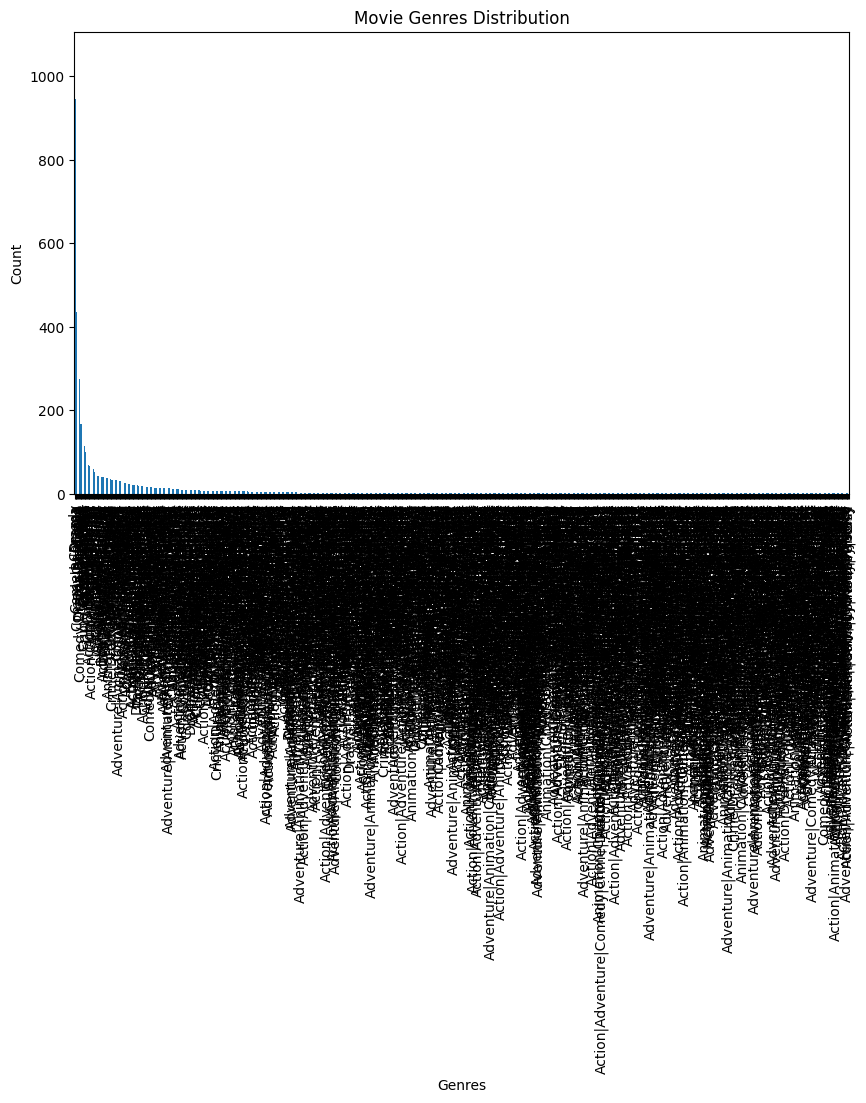

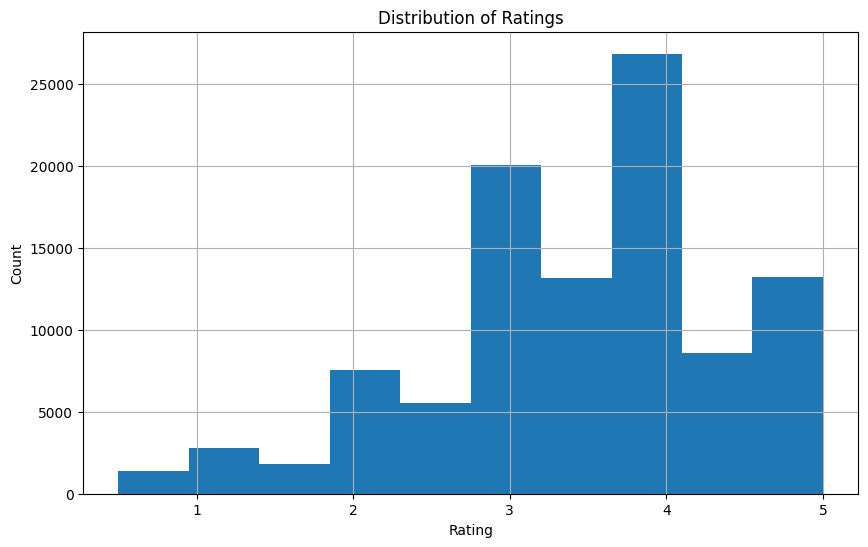

In [ ]:
plt.figure(figsize=(10,6))
movies['genres'].value_counts().plot(kind='bar')
plt.title('Movie Genres Distribution')
plt.xlabel('Genres')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(10,6))
ratings['rating'].hist(bins=10)
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

**Data Preprocessing**

In [ ]:
# Combine genres and movie title for feature creation
movies['features'] = movies['title'] + ' ' + movies['genres']

# Create a TF-IDF Vectorizer object
tfidf = TfidfVectorizer(stop_words='english')

# Construct the TF-IDF matrix
tfidf_matrix = tfidf.fit_transform(movies['features'])

# Compute cosine similarity
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

**Define Target Variable (y) and Feature Variables (X)**

For content-based filtering, we don't explicitly define y and X

Instead, we use the cosine similarity matrix for recommendations

**Train Test Split**

In [ ]:
# For content-based filtering, we typically don't need a train-test split
# However, if we want to evaluate our system, we can split the ratings data
train_data, test_data = train_test_split(ratings, test_size=0.2, random_state=42)

**Modeling**

In [ ]:
def get_recommendations(title, cosine_sim=cosine_sim):
    idx = movies[movies['title'] == title].index[0]
    sim_scores = list(enumerate(cosine_sim[idx]))
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    sim_scores = sim_scores[1:11]
    movie_indices = [i[0] for i in sim_scores]
    return movies['title'].iloc[movie_indices]

**Model Evaluation**

In [ ]:
# For content-based filtering, traditional evaluation metrics like RMSE aren't applicable
# We can use a qualitative evaluation by checking the recommendations for a few movies

print(get_recommendations('Toy Story (1995)'))
print(get_recommendations('Casino (1995)'))

2355                       Toy Story 2 (1999)
7355                       Toy Story 3 (2010)
3595                          Toy, The (1982)
2539    We're Back! A Dinosaur's Story (1993)
26                        Now and Then (1995)
4089                      Toy Soldiers (1991)
1617            NeverEnding Story, The (1984)
6194                         Wild, The (2006)
1                              Jumanji (1995)
12                               Balto (1995)
Name: title, dtype: object
7472      Casino Jack (2010)
6346    Casino Royale (2006)
4066    Casino Royale (1967)
26       Now and Then (1995)
529          Two Much (1995)
6424        Citizen X (1995)
223     Kiss of Death (1995)
5                Heat (1995)
132          Clockers (1995)
241         My Family (1995)
Name: title, dtype: object


**Prediction**

In [ ]:
user_movie = input("Enter a movie you like: ")
recommendations = get_recommendations(user_movie)
print(f"Based on {user_movie}, we recommend:")
print(recommendations)

Enter a movie you like: Flint (2017)
Based on Flint (2017), we recommend:
3910           Our Man Flint (1965)
3909           In Like Flint (1967)
9472    Call Me by Your Name (2017)
9462                 Get Out (2017)
9584                      It (2017)
9512                The Hero (2017)
9579               The House (2017)
9649                  Wonder (2017)
9613           American Made (2017)
9486               Free Fire (2017)
Name: title, dtype: object


**Explanation**

This project implements a content-based movie recommendation system. Here's how it works:

We start by importing necessary libraries and loading our data.
We perform some basic data visualization to understand our dataset better.
In the preprocessing step, we combine movie titles and genres to create a 'features' column.
We use TF-IDF vectorization to convert our text data into numerical data that can be processed.
We compute cosine similarity between all movies based on their TF-IDF vectors.
Our model doesn't use traditional machine learning algorithms. Instead, it uses cosine similarity to find movies similar to a given movie.
The get_recommendations function takes a movie title as input and returns the top 10 most similar movies.
We evaluate our model qualitatively by checking recommendations for a few sample movies.
Finally, we allow the user to input a movie they like and get recommendations based on that movie.